In [103]:
#import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

%pylab inline

pylab.rcParams['figure.figsize'] = (15,9)

Populating the interactive namespace from numpy and matplotlib


In [104]:
#set pandas display options

pd.options.display.float_format = '{:,.2f}'.format

pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

In [105]:
#import data as dataframe with column names
#original dataset does not have column names, so use 'names' argument

df = pd.read_csv('dataset/BNC2_sample.csv',
                names = ['Code', 'Date', 'Open', 'High', 'Low',
                        'Close', 'Volume', 'VWAP', 'TWAP'])

In [106]:
#check dataframe

df.head()

,Code,Date,Open,High,Low,Close,Volume,VWAP,TWAP
0,GWA_BTC,2014-04-01,467.28,488.62,467.28,479.56,"74,776.48",482.76,482.82
1,GWA_BTC,2014-04-02,479.20,494.30,431.32,437.08,"114,052.96",460.19,465.93
2,GWA_BTC,2014-04-03,437.33,449.74,414.41,445.60,"91,415.08",432.29,433.28
3,GWA_BTC,2014-04-04,445.18,456.10,429.16,449.81,"51,147.27",443.46,443.93
4,GWA_BTC,2014-04-05,450.08,464.09,445.16,461.70,"28,449.19",452.53,452.95


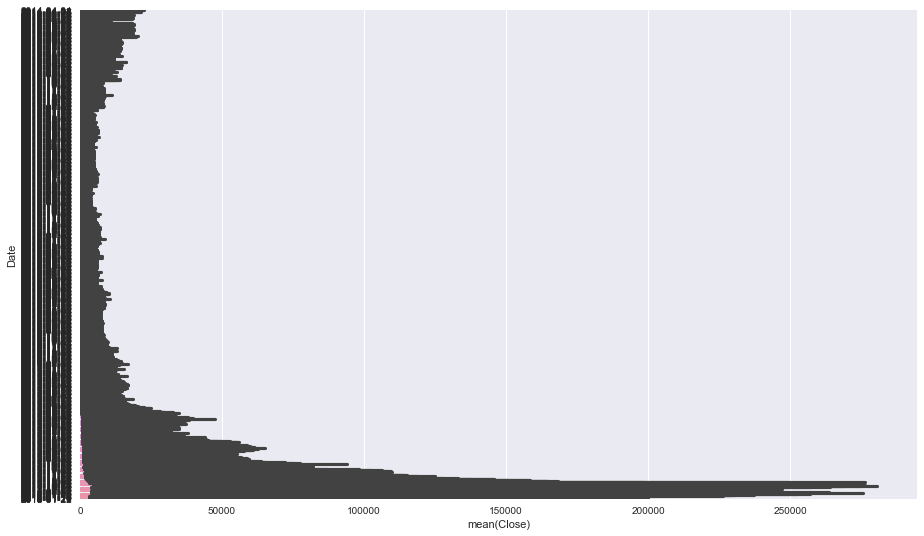

In [107]:
sns.barplot(x = 'Close', y = 'Date', data=df)

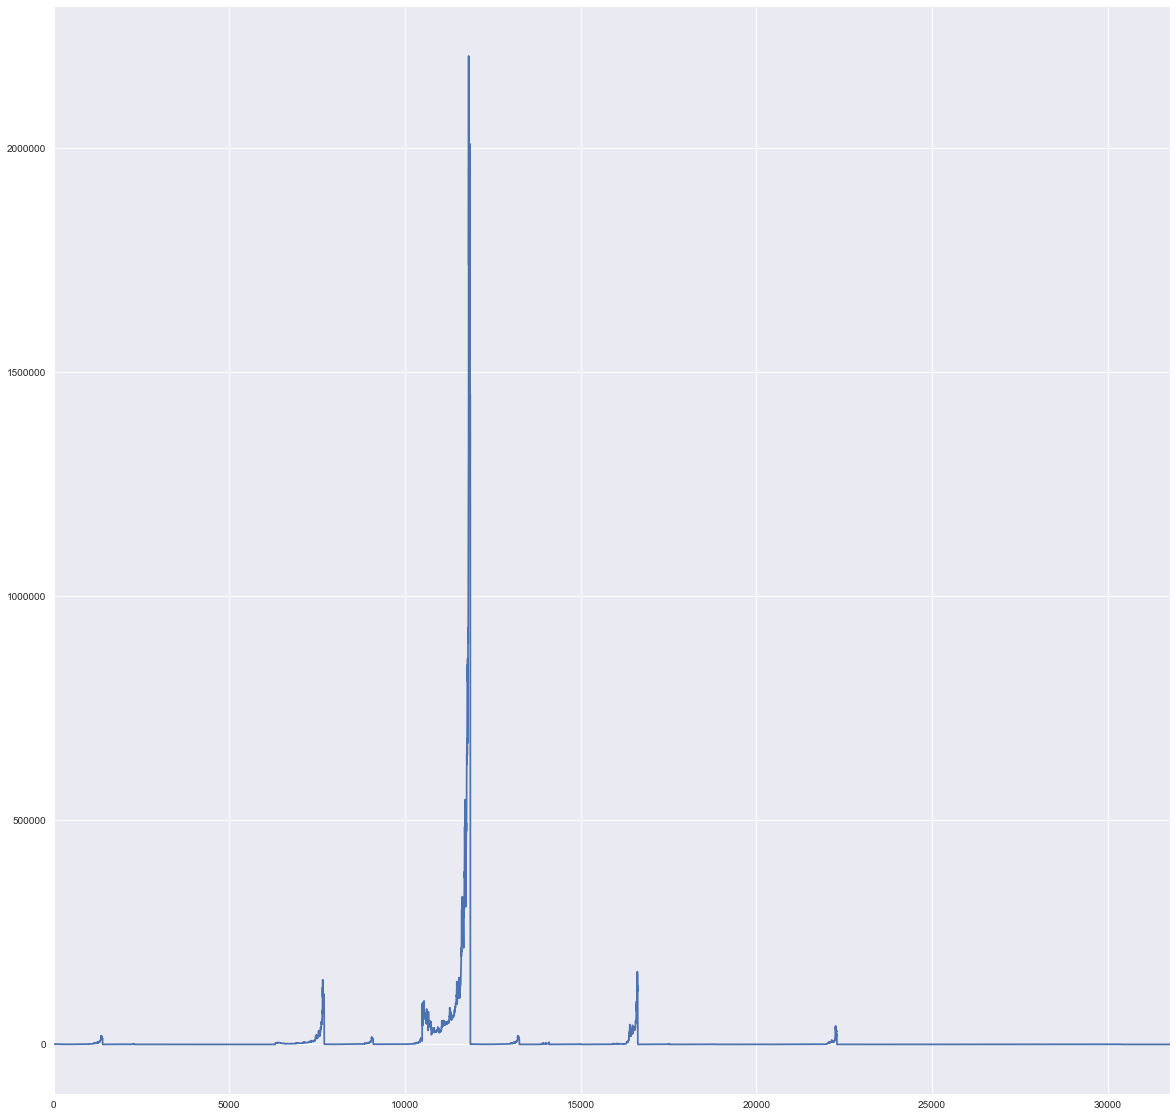

In [108]:
#quick visual of 'Close' prices, historical

df['Close'].plot(figsize=(20,20))
plt.show()

_A quick seaborn graph displays the volatility, but it is looking __too__ volatile even for cryptocurrency._

In [109]:
#check 'Code' categorical

df.Code.unique()

array(['GWA_BTC', 'GWA_ETH', 'GWA_LTC', 'GWA_XLM', 'GWA_XRP',
       'MWA_BTC_CNY', 'MWA_BTC_EUR', 'MWA_BTC_GBP', 'MWA_BTC_JPY',
       'MWA_BTC_USD', 'MWA_ETH_CNY', 'MWA_ETH_EUR', 'MWA_ETH_GBP',
       'MWA_ETH_JPY', 'MWA_ETH_USD', 'MWA_LTC_CNY', 'MWA_LTC_EUR',
       'MWA_LTC_GBP', 'MWA_LTC_JPY', 'MWA_LTC_USD', 'MWA_XLM_CNY',
       'MWA_XLM_EUR', 'MWA_XLM_USD', 'MWA_XRP_CNY', 'MWA_XRP_EUR',
       'MWA_XRP_GBP', 'MWA_XRP_JPY', 'MWA_XRP_USD'], dtype=object)

-  __MWA__ stands for __market-weighted average__, which displays regional prices. There are multiple MWA codes for each cryptocurrency, one for each local __fiat__ currency.
<br>
-  __GWA__ stands for __global-weighted average__, which displays globally indexed prices. __GWA__ is an aggregation of __MWA__ and, thus, not equivalent in granularity.

In [110]:
#example of GWA and MWA relationship

df[df.Code.isin(['GWA_BTC', 'MWA_BTC_JPY', 'MWA_BTC_EUR'])
  & (df.Date == '2018-01-01')]

,Code,Date,Open,High,Low,Close,Volume,VWAP,TWAP
1371,GWA_BTC,2018-01-01,"14,505.89","14,505.89","13,617.46","14,092.74","225,906.21","14,103.18","14,093.73"
9074,MWA_BTC_EUR,2018-01-01,"11,859.35","11,859.35","11,111.07","11,403.92","14,933.73","11,488.45","11,478.08"
11838,MWA_BTC_JPY,2018-01-01,"1,674,341.45","1,678,567.55","1,572,173.90","1,632,657.51","68,611.95","1,632,994.40","1,631,407.66"


_This shows that there are multiple entries for a cryptocurrency on a given date. In addition, the regional MWA data are in the respective region's local currency._ 

***

_It's important to account for the wide variance in granularity. Therefore, the unwanted observations must be filtered out._

In [111]:
#check dataframe shape, prior to removing unwanted observations

df.shape

(31761, 9)

In [112]:
#create list for GWA_ codes

gwa_codes = [code for code in df.Code.unique() if 'GWA_' in code]

In [113]:
#write over the dataframe, keeping only the GWA_ codes

df = df[df.Code.isin(gwa_codes)]

In [114]:
#check dataframe shape, after the removal of unwanted observations

df.shape

(6309, 9)

_Now, with only the GWA codes remaining, all the observations are equivalent in granularity and in units_.

In [115]:
df.Code.unique()

array(['GWA_BTC', 'GWA_ETH', 'GWA_LTC', 'GWA_XLM', 'GWA_XRP'], dtype=object)

***

_As a brief interlude, it is important to look at the observations of the major cryptocurrencies, just to get a visual of their volatility and relationship, if any._

In [116]:
#create sammple subset of only BTC observations

gwa_BTC_codes = df[df.Code.isin(['GWA_BTC'])]

In [117]:
#check shape

gwa_BTC_codes.shape

(1394, 9)

In [118]:
#check observations

gwa_BTC_codes.head()

,Code,Date,Open,High,Low,Close,Volume,VWAP,TWAP
0,GWA_BTC,2014-04-01,467.28,488.62,467.28,479.56,"74,776.48",482.76,482.82
1,GWA_BTC,2014-04-02,479.20,494.30,431.32,437.08,"114,052.96",460.19,465.93
2,GWA_BTC,2014-04-03,437.33,449.74,414.41,445.60,"91,415.08",432.29,433.28
3,GWA_BTC,2014-04-04,445.18,456.10,429.16,449.81,"51,147.27",443.46,443.93
4,GWA_BTC,2014-04-05,450.08,464.09,445.16,461.70,"28,449.19",452.53,452.95


In [119]:
#set the 'Date' as the plot index

gwa_BTC_codes.index = gwa_BTC_codes['Date']

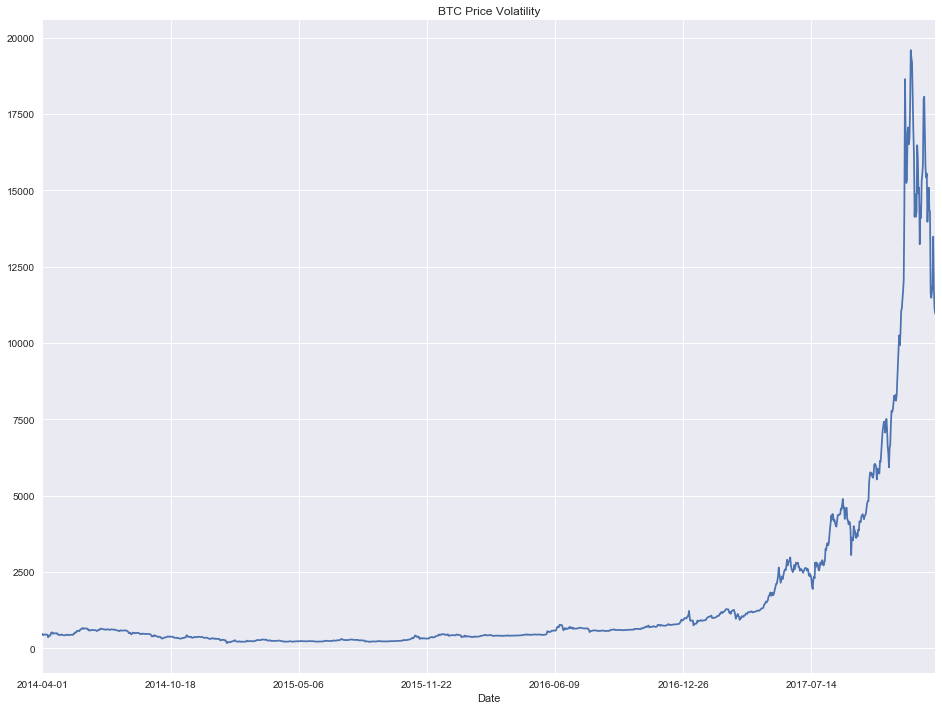

In [120]:
#make a straightfoward plot

gwa_BTC_codes['Close'].plot(figsize=(16,12), grid=True)
title('BTC Price Volatility')
plt.show()

In [123]:
#now, we'll make the same lists for the two other popular cryptos

gwa_ETH_codes = df[df.Code.isin(['GWA_ETH'])]
gwa_LTC_codes = df[df.Code.isin(['GWA_LTC'])]

In [177]:
#again, checking shapes

print(gwa_ETH_codes.shape)
print(gwa_LTC_codes.shape)

(900, 9)
(1394, 9)


In [178]:
#again, setting 'Date' as index

gwa_ETH_codes.index = gwa_ETH_codes['Date']
gwa_LTC_codes.index = gwa_LTC_codes['Date']

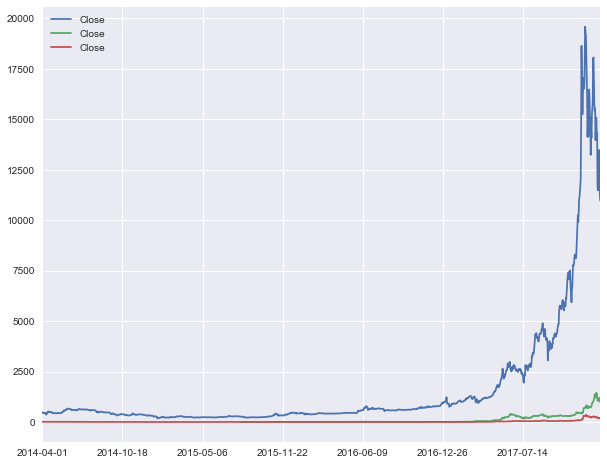

In [184]:
#use pd.concat to plot the individual 'Close' observations onto one another

pd.concat([gwa_BTC_codes['Close'], gwa_ETH_codes['Close'], gwa_LTC_codes['Close']], axis=1).plot(figsize=(10,8))
plt.show()

_Though a comparison as this one does not help much since LTC and ETH trade as such lower values than BTC, similar spikes may be seen, nonetheless._

_Below, we can see a close-up of LTC's historical transactional value

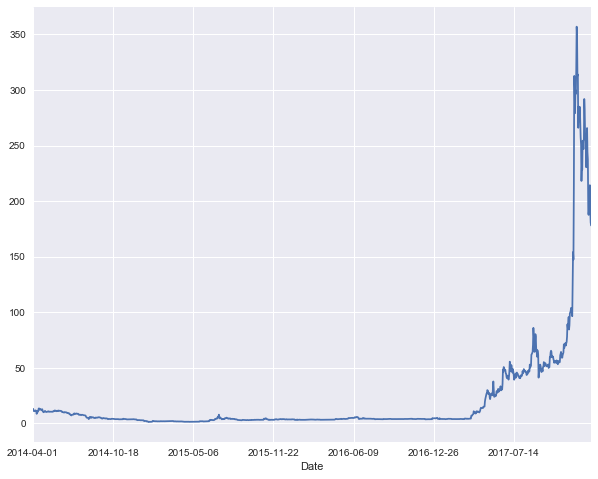

In [183]:
gwa_LTC_codes['Close'].plot(figsize=(10,8))